<a href="https://colab.research.google.com/github/omarguerra/University-Malaya/blob/master/Linear_BVP_finite_difference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matrix A =

[[ 2.15421257 -1.          0.          0.          0.          0.
   0.        ]
 [-1.          2.15421257 -1.          0.          0.          0.
   0.        ]
 [ 0.         -1.          2.15421257 -1.          0.          0.
   0.        ]
 [ 0.          0.         -1.          2.15421257 -1.          0.
   0.        ]
 [ 0.          0.          0.         -1.          2.15421257 -1.
   0.        ]
 [ 0.          0.          0.          0.         -1.          2.15421257
  -1.        ]
 [ 0.          0.          0.          0.          0.         -1.
   2.15421257]]


Matix b =

[[ 1.28494767e+00]
 [ 2.18089506e-01]
 [ 1.18029190e-01]
 [ 1.88855929e-17]
 [-1.18029190e-01]
 [-2.18089506e-01]
 [-1.28494767e+00]]


Final result U=

[[ 0.92570593]
 [ 0.70921967]
 [ 0.3840145 ]
 [ 0.        ]
 [-0.3840145 ]
 [-0.70921967]
 [-0.92570593]]




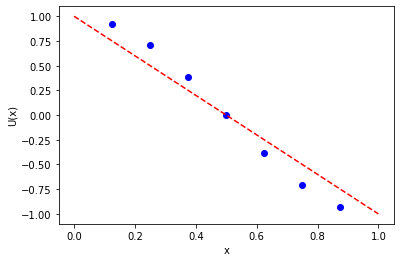

In [ ]:
import numpy as np
import scipy.sparse
from scipy.linalg import solve
import matplotlib.pyplot as mpl

#the problem considers a linear BVP -u"+ (pi)^2u = 2(pi)^2cos(pi*x) where u(0)= 1 and u(1)= -1
#We also have chose h=1/8, we now try to find U matrix and plot the result

#declaring all the parameters 
N = 7
p = 0
q = np.pi**2
h = 1/(N+1)

#we define the function f(x)
def f(x):
  return 2*(np.pi**2)*np.cos(np.pi*x)

#we now set the boundary conditions
g0 = 1.0
g1 = -1.0

#Using the algorithm for finite difference method for linear BVPS we create a triadiagonal matrix system AU =b
#build the index that distributes algorithm along diagonals of matrix A
a = np.zeros((3,N))
a[0,:]=-(1.0+0.5*p*h)
a[1,:]=(2+q*h**2)
a[2,:]=-(1.0-0.5*p*h)

#transform index into triadiagonal matrix A, print A into array
A = scipy.sparse.spdiags(a,[-1,0,1],N,N,format='csc')
A = A.toarray()

#Create matrix b
b = np.zeros((N,1))
b[0,:]=(1.0+0.5*p*h)*g0 + (h**2*f(0.125))
b[1,:]=(h**2)*f(0.25)
b[2,:]=(h**2)*f(0.375)
b[3,:]=(h**2)*f(0.5)
b[4,:]=(h**2)*f(0.625)
b[5,:]=(h**2)*f(0.75)
b[6,:]=(1.0-0.5*p*h)*g1 + (h**2*f(0.875))

print('Matrix A =\n')
print(A)
print('\n')
print('Matix b =\n')
print(b)
print('\n')


#Solve the triadiagonal matrix
U =solve(A,b)
print('Final result U=\n')
print(U)
print('\n')


#plot the matrix

#first create another matrix as x-scalar for your result
#x is varying with h
x = np.zeros((N,1))
x[0,:]=0.125
x[1,:]=0.25
x[2,:]=0.375
x[3,:]=0.5
x[4,:]=0.625
x[5,:]=0.75
x[6,:]=0.875

#label your plot
mpl.xlabel('x')
mpl.ylabel('U(x)')

#plot matrix x and U
mpl.plot(x.T,U.T,'bo')

#put the boundary condition in your plot
xx = [0.0,1.0]
yy = [1.0,-1.0]
mpl.plot(xx,yy,'r--')

#show graph
mpl.show()